# Data Visualization with Python

## Course Final Assignment

---

### K.Nithya
### May 2023

---

### Introduction

This is the Final Assignment for the course Data Visualization with Python, as part of the IBM Data Science Professional Certification on Coursera, taught by Alex Aklson (Ph.D., Data Scientist / IBM Developer Skills Network).

As tool to perform the assigned tasks I have chosen a Jupyter Notebook with Python 3.6 kernel on IBM Watson Studio.

The assignment is composed of four tasks to be performed based on two provided datasets, the first dataset contains the results of a survey  with 2233 respondents on their interest in Data Science areas, the second dataset contains the records of crimes in San Francisco (CA) in 2016.

In short words the tasks are the following:
1. Download the survey dataset from the provided URL and prepare the dataframe as given model.
1. Reproduce a bar chart based on the survey dataset with the percentage of interest for each Data Science area.
1. Download the San Francisco crimes dataset from the provided URL and prepare a dataframe grouped by district as given model.
1. Show a Choropleth map of the San Francisco crimes.

---



---
### Task 1. Create Survey dataframe based on CSV file from the provided path (URL and file name).

Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

Load the CSV file into Survey dataframe

In [2]:
# create a variable with the provided url and file name
file_source = 'https://cocl.us/datascience_survey_data'

# create the dataframe and define the first column as index
df_survey = pd.read_csv(file_source, index_col=[0])

# show the data frame
df_survey

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74


---
### Task 2.  Create a percentage bar chart based on Survey dataframe.

Calculate the percentage for each value and sort the dataframe

In [3]:
# Create a dataframe in percentage values (2233 respondents)
df_percent = round(df_survey/2233, 4)

# Sort the dataframe from 'Very interested' to 'Not interested'
df_percent.sort_values(by=list(df_percent.columns), ascending=False, inplace=True)

df_percent

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,0.7559,0.1988,0.0269
Machine Learning,0.7295,0.2136,0.0331
Data Visualization,0.6001,0.3287,0.0457
Big Data (Spark / Hadoop),0.5965,0.3265,0.0569
Deep Learning,0.5656,0.3448,0.0609
Data Journalism,0.1921,0.4841,0.2732


Create the percentage bar chart using Matplotlib Artitst layer

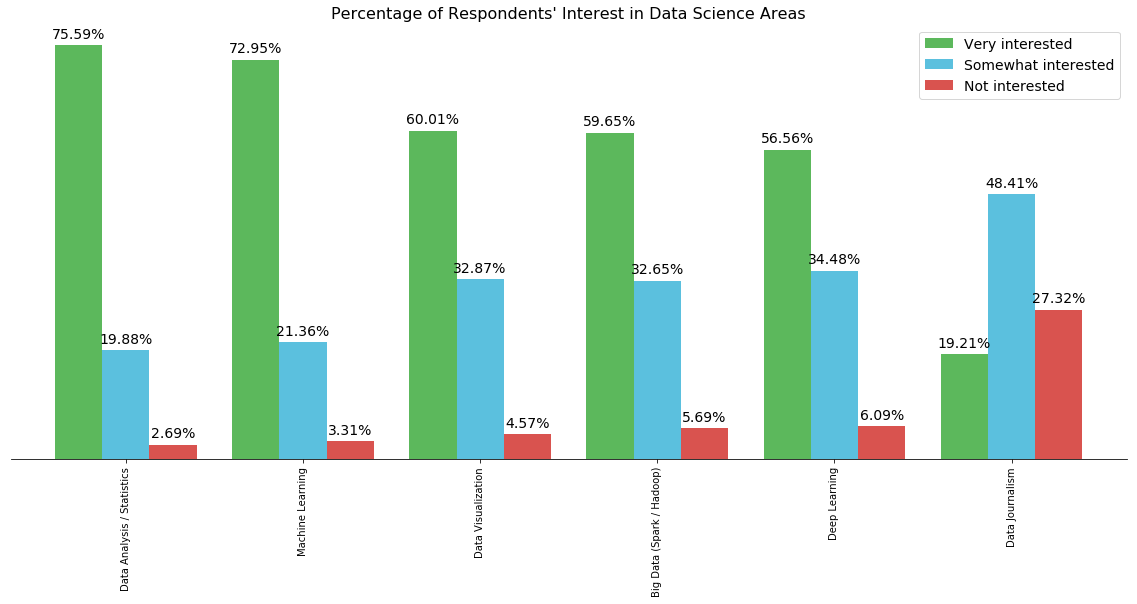

In [4]:
# create a Axes variable for the bar chart
bax = df_percent.plot(kind='bar', figsize=(20,8), width=0.8, color=['#5cb85c','#5bc0de','#d9534f'])

# Set the font size to 14
mpl.rc('font', size=14)       # general font size
mpl.rc('xtick', labelsize=14) # x-axis labels

# define title
bax.set_title('Percentage of Respondents\' Interest in Data Science Areas', {'fontsize':16})

# set legend font size
bax.legend(fontsize=14)

# Hide the y-axis labels
bax.axes.get_yaxis().set_visible(False)

# Remove the borders
bax.spines["top"].set_visible(False)
bax.spines["left"].set_visible(False)
bax.spines["right"].set_visible(False)

# annotate the figures over the bars
for patch in bax.patches[0:]:
    h = patch.get_height()
    x = patch.get_x() + patch.get_width()/2.
    bax.annotate('{:.2%}'.format(patch.get_height()), xy=(x,h), xytext=(0,4), textcoords="offset points", ha="center", va="bottom")

---
### Task 3. Create San Francisco Crime dataframe based on CSV file from the provided path (URL and file name).

Load the CSV file into San Francisco Crime dataframe

In [5]:
# create a variable with the provided url and file name
file_source = 'https://cocl.us/sanfran_crime_dataset'

# create the dataframe
df_sfc = pd.read_csv(file_source)

# show the data frame
print('Dataframe shape:', df_sfc.shape)
df_sfc.head()

Dataframe shape: (150500, 13)


,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


Group the data by PdDistrict counting the incidents

In [6]:
# group the data by PdDistrict and count the incidents
df_sfcgr = df_sfc[['PdDistrict','IncidntNum']].groupby(['PdDistrict']).count().reset_index()

# Change the column names
df_sfcgr.rename(columns={'PdDistrict':'Neighborhood', 'IncidntNum':'Count'}, inplace=True)

# Show the dataframe
df_sfcgr

,Neighborhood,Count
0,BAYVIEW,14303
1,CENTRAL,17666
2,INGLESIDE,11594
3,MISSION,19503
4,NORTHERN,20100
5,PARK,8699
6,RICHMOND,8922
7,SOUTHERN,28445
8,TARAVAL,11325
9,TENDERLOIN,9942


---
### Task 4. Create a Choropleth map to visualize the San Franciscos Crime data

Install ***folium*** library

In [ ]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

Load the GeoJSON file from San Francisco neighborhood into a variable (provided path)

In [ ]:
# Download the GeoJSON file from provided path
!wget --quiet https://cocl.us/sanfran_geojson -O geo_sanfrancisco.json

# Load the GeoJson file into a variable
geo_sf = r'geo_sanfrancisco.json'

print('GeoJSON data ready')

Create the San Francisco Choropleth map

In [ ]:
# Set variables for San Francisco latitude and longitude
ltd = 37.77
lgd = -122.42

# Create the San Francisco map
sf_map = folium.Map(location=[ltd,lgd], zoom_start=12)

# Set the Choropleth parameters
sf_map.choropleth(geo_data=geo_sf,
                  data=df_sfcgr,
                  columns=['Neighborhood','Count'],
                  key_on='feature.properties.DISTRICT',
                  fill_color='YlOrRd',
                  fill_opacity=0.7,
                  line_opacity=0.2,
                  legend_name='Crime Rate in San Francisco')

# Show the map
sf_map

---